In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import itertools as it
import sys
import progressbar

folder = "store/localization"

In [2]:
!ls $folder

dat_N_100_r_1.00_w_0.10.npy  dat_N_350_r_1.00_w_0.10.npy
dat_N_100_r_1.00_w_0.20.npy  dat_N_350_r_1.00_w_0.20.npy
dat_N_100_r_1.00_w_0.30.npy  dat_N_350_r_1.00_w_0.30.npy
dat_N_100_r_1.00_w_0.40.npy  dat_N_350_r_1.00_w_0.40.npy
dat_N_100_r_1.00_w_0.50.npy  dat_N_350_r_1.00_w_0.50.npy
dat_N_100_r_1.00_w_0.60.npy  dat_N_350_r_1.00_w_0.60.npy
dat_N_100_r_1.00_w_0.70.npy  dat_N_350_r_1.00_w_0.70.npy
dat_N_100_r_1.00_w_0.80.npy  dat_N_350_r_1.00_w_0.80.npy
dat_N_100_r_1.00_w_0.90.npy  dat_N_350_r_1.00_w_0.90.npy
dat_N_100_r_1.00_w_1.00.npy  dat_N_350_r_1.00_w_1.00.npy
dat_N_100_r_1.00_w_1.10.npy  dat_N_350_r_1.00_w_1.10.npy
dat_N_100_r_1.00_w_1.20.npy  dat_N_350_r_1.00_w_1.20.npy
dat_N_100_r_1.00_w_1.30.npy  dat_N_350_r_1.00_w_1.30.npy
dat_N_100_r_1.00_w_1.40.npy  dat_N_350_r_1.00_w_1.40.npy
dat_N_100_r_1.00_w_1.50.npy  dat_N_350_r_1.00_w_1.50.npy
dat_N_100_r_1.00_w_1.60.npy  dat_N_350_r_1.00_w_1.60.npy
dat_N_100_r_1.00_w_1.70.npy  dat_N_350_r_1.00_w_1.70.npy
dat_N_100_r_1.00_w_1.80.npy  da

In [3]:
v_N = np.arange(50,501,50)
v_r = np.array([1., 2., 3.])
v_w = np.arange(.1,2.1,.1)

N_N, N_r, N_w = v_N.size, v_r.size, v_w.size

## Load separate data and save in joint np file (skip if already done for data)

In [4]:

S_mean = []
S_std = []
S_N = []

# the loop with progress bar
bar = progressbar.ProgressBar(maxval=N_N*N_r*N_w, \
widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])

count = 0
bar.start()   

for i_N, N in enumerate(list(v_N)):
    S_mean_rw = np.zeros((N_r,N_w,N+1), dtype="float")
    S_std_rw = np.zeros((N_r,N_w,N+1), dtype="float")
    S_N_rw = np.zeros((N_r,N_w), dtype="int")
    
    for i_r, r in enumerate(list(v_r)):
        for i_w, w in enumerate(list(v_w)):
            filename = "/dat_N_" + str(N) + "_r_" + "{:.2f}".format(r) + "_w_" + "{:.2f}".format(w) + ".npy"
            dat = np.load(folder + filename)
            S_mean_rw[i_r,i_w,:] = np.mean(dat,axis=0)
            S_std_rw[i_r,i_w,:] = np.std(dat,axis=0)
            S_N_rw[i_r,i_w] = dat.shape[0]
            
            count+=1
            bar.update(count)
    
    S_mean.append(S_mean_rw)
    S_std.append(S_std_rw)
    S_N.append(S_N_rw)
    
bar.finish()
            
            

[========================================================================] 100%


## Plots of entanglement scaling

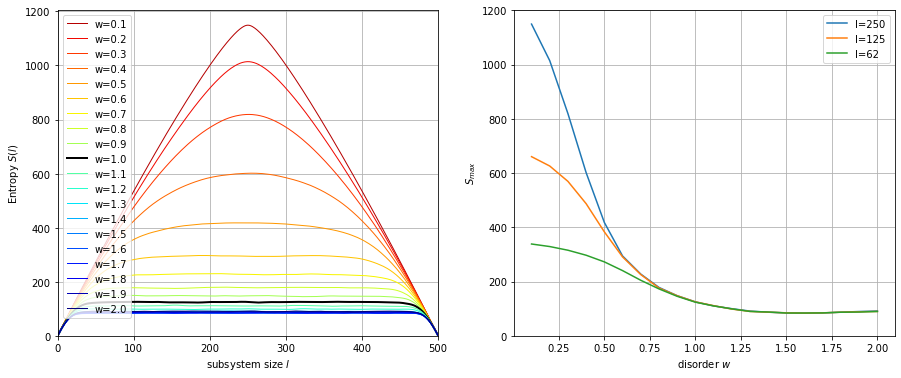

In [5]:
# scaling with subsystem size

N = 500
r = 3.

i_N = np.argmin(np.abs(v_N-N))
i_r = np.argmin(np.abs(v_r-r))

# get data to plot
S_plot = S_mean[i_N][i_r,:,:]

# color code
clr = plt.cm.jet_r(v_w/np.max(v_w)) 

fig, ax = plt.subplots(1,2, figsize=(15,6))

for i_w, w in enumerate(list(v_w)):
    if np.abs(w-1.) < 1e-3:
        p=ax[0].plot(S_plot[i_w], label="w="+"{:.1f}".format(w), color="black", linewidth=2.)
    else:
        p=ax[0].plot(S_plot[i_w], label="w="+"{:.1f}".format(w), color=clr[i_w], linewidth=1.)
    
    
ax[0].legend()
ax[0].set_xlim([0,N])
ax[0].set_ylim(bottom=0.)
ax[0].set_xlabel(r"subsystem size $l$")
ax[0].set_ylabel(r"Entropy $S(l)$")
ax[0].grid(True)

ax[1].plot(v_w,S_plot[:,N//2], label="l=" + str(N//2))
ax[1].plot(v_w,S_plot[:,N//4], label="l=" + str(N//4))
ax[1].plot(v_w,S_plot[:,N//8], label="l=" + str(N//8))
ax[1].grid(True)
ax[1].set_ylim(bottom=0.)
ax[1].set_xlabel(r"disorder $w$")
ax[1].set_ylabel(r"$S_{max}$")
ax[1].legend()

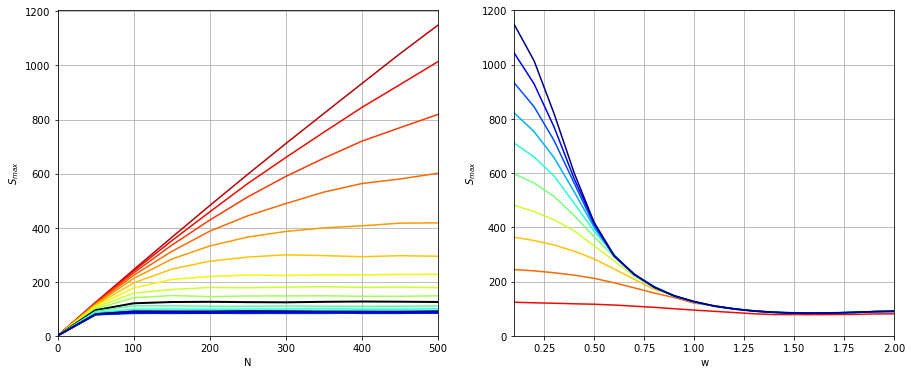

In [7]:
# scaling with system size
r = 3.

i_r = np.argmin(np.abs(v_r-r))

# collect data to plot
S_max = np.zeros((N_N,N_w))
for i_N,N in enumerate(list(v_N)):
    for i_w,w in enumerate(list(v_w)):
        S_max[i_N,i_w] = S_mean[i_N][i_r,i_w,N//2]
        
S_max = np.concatenate((np.zeros((1,N_w)),S_max), axis=0)
        
fig,ax = plt.subplots(1,2, figsize=(15,6))

# first panel

# color code
clr = plt.cm.jet_r(v_w/np.max(v_w)) 

for i_w,w in enumerate(list(v_w)):
    if np.abs(w-1.) < 1e-3:
        ax[0].plot(np.insert(v_N,0,0.),S_max[:,i_w],color="black", linewidth=2., label="w={:.2f}".format(w))
    else:
        ax[0].plot(np.insert(v_N,0,0.),S_max[:,i_w],color=clr[i_w], label="w={:.2f}".format(w))
ax[0].set_xlabel("N")
ax[0].set_xlim(0.,np.max(v_N))
ax[0].set_ylim(bottom=0.)
# second panel

# color code
clr = plt.cm.jet_r(v_N/np.max(v_N)) 

for i_N,N in enumerate(list(v_N)):
    ax[1].plot(v_w,S_max[i_N+1,:],color=clr[i_N], label="N="+str(N))
ax[1].set_xlabel("w")
ax[1].set_xlim(np.min(v_w),np.max(v_w))
ax[1].set_ylim(bottom=0.)


for a in ax:
    #a.legend()
    a.grid(which="both")
    a.set_ylabel(r"$S_{max}$")
